In [20]:
# 🚗 Used Car Price Prediction - Cardekho Dataset

# 📌 1. Problem Statement & Objective
"""
Problem Statement:
The used car market in India is dynamic and often inconsistent. Prices vary due to brand, usage, condition, and many other factors.

Objective:
To build a machine learning model that predicts the price of a used car based on its features, using real-world data from Cardekho.com.

Benefits:
- Helps sellers price their vehicles better.
- Enables buyers to spot fair deals.
- Improves overall market efficiency.
"""

# 📦 2. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 📂 3. Load Dataset
file_path = r"D:\WsCube Tech\PYTHON FILES\Cardekho.csv"
df = pd.read_csv(file_path)

In [3]:
# 🕵️ 4. Initial Exploration
print("\nDataset Shape:", df.shape)
display(df.head())


Dataset Shape: (15411, 14)


,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
# 🔍 5. Data Information
print("\nData Types & Missing Values:")
df.info()

print("\nSummary Statistics:")
display(df.describe())


Data Types & Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB

Summary Statistics:


,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


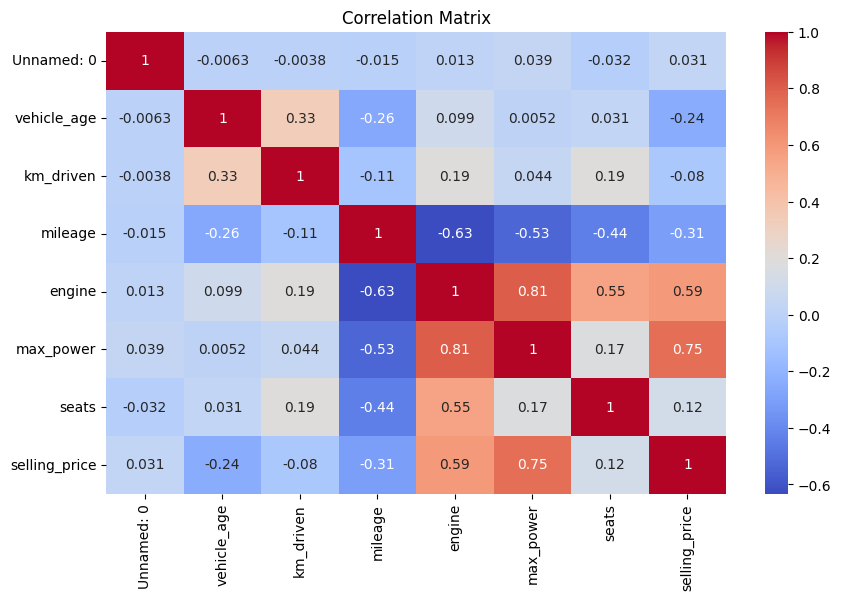

In [12]:
# 📊 6. Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

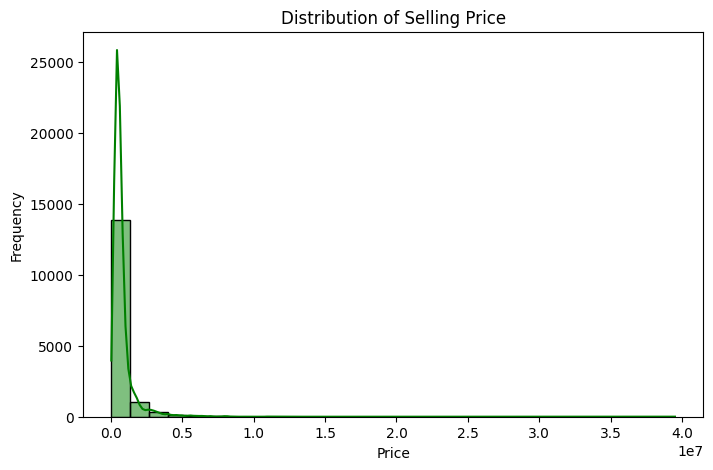

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], bins=30, kde=True, color='green')
plt.title("Distribution of Selling Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

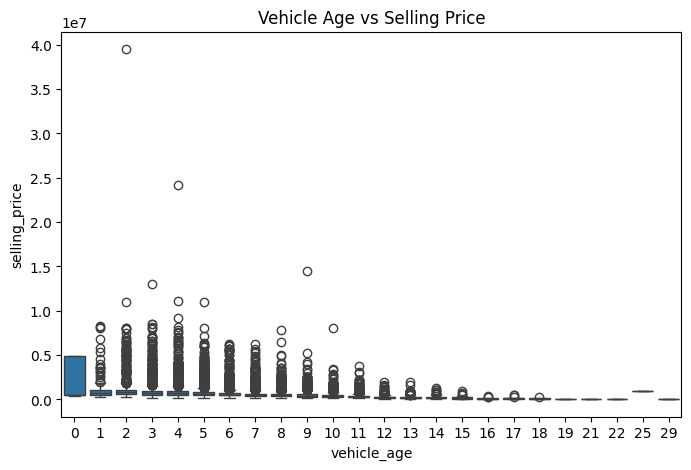

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='vehicle_age', y='selling_price', data=df)
plt.title("Vehicle Age vs Selling Price")
plt.show()

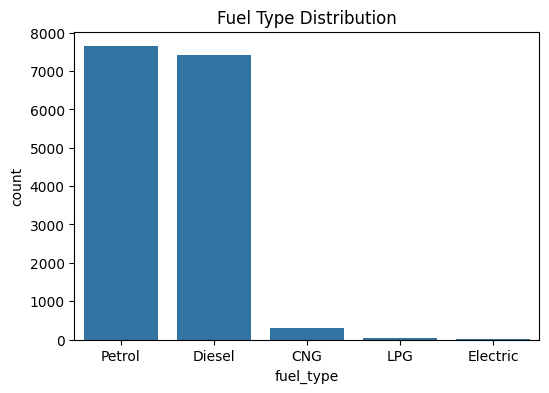

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='fuel_type', data=df)
plt.title("Fuel Type Distribution")
plt.show()

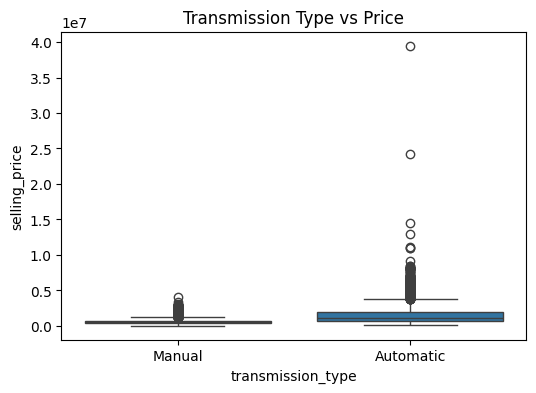

In [8]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='transmission_type', y='selling_price', data=df)
plt.title("Transmission Type vs Price")
plt.show()

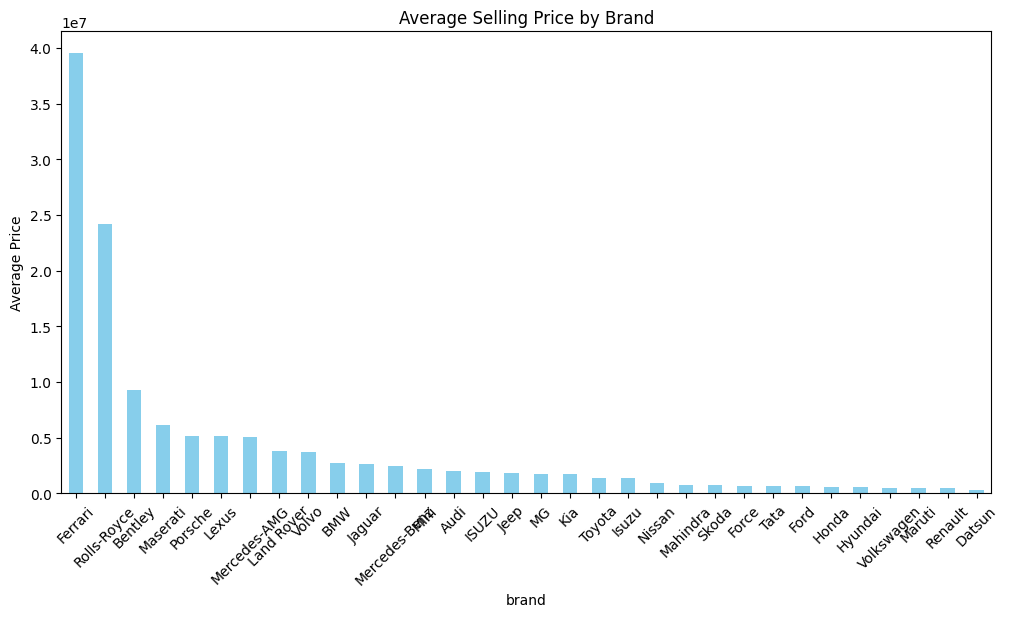

In [7]:
brand_price = df.groupby('brand')['selling_price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
brand_price.plot(kind='bar', color='skyblue')
plt.title("Average Selling Price by Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

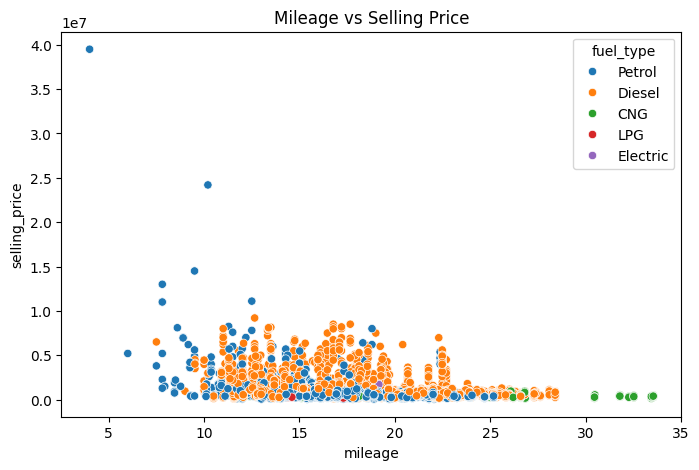

In [6]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='mileage', y='selling_price', data=df, hue='fuel_type')
plt.title("Mileage vs Selling Price")
plt.show()

In [19]:

# 🛠️ 7. Data Preprocessing & Feature Engineering
le = LabelEncoder()
cat_cols = ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
# 🤖 8. Model Building & Evaluation
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model.__class__.__name__} - RMSE: {rmse:.2f}, R2 Score: {r2:.2f}")
    return r2

models = [LinearRegression(), Ridge(), Lasso(), RandomForestRegressor(random_state=42)]
model_scores = {}
for model in models:
    r2 = evaluate_model(model)
    model_scores[model.__class__.__name__] = r2

LinearRegression - RMSE: 500638.09, R2 Score: 0.67
Ridge - RMSE: 500613.84, R2 Score: 0.67
Lasso - RMSE: 500637.14, R2 Score: 0.67
RandomForestRegressor - RMSE: 217018.02, R2 Score: 0.94


In [15]:
# 🧪 9. Model Comparison
best_model = max(model_scores, key=model_scores.get)
print("\nBest Model:", best_model)



Best Model: RandomForestRegressor


In [16]:
# 📉 10. Conclusion & Recommendations
"""
- We trained multiple models; RandomForest gave the best performance.
- Features like vehicle age, km driven, engine, and brand have a strong impact on pricing.
- This model can now be used for real-world pricing assistance in the used car market.
"""

'\n- We trained multiple models; RandomForest gave the best performance.\n- Features like vehicle age, km driven, engine, and brand have a strong impact on pricing.\n- This model can now be used for real-world pricing assistance in the used car market.\n'